In [14]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [10]:
dfs = pd.read_excel("Assignment_1_dataset_50Startups.xlsx", skiprows = 0)
dfs

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
dfs = dfs.replace(0, np.nan) 
dfs = dfs.fillna(dfs.mean())


x = dfs.iloc[:, :-1] 
y = dfs.iloc[:, -1:]
y = dfs.iloc[:, -1:].values

#catagorical_Data = dataSet1.iloc[:, 3]
x=pd.concat([x,pd.get_dummies(dfs['State'],prefix='State')],axis=1).drop(['State'],axis=1)
x = x.iloc[:, :-1]

#print(x.iloc[:, 0])
for i in range(0,3):
    x.iloc[:,i] = ( x.iloc[:,i] - np.mean(x.iloc[:,i]) ) / (np.max(x.iloc[:,i]) - np.min(x.iloc[:,i]))

x = np.array(x)
x= np.insert(x, 0, 1, axis=1)
pd.DataFrame(np.array(x))

[r, c] = x.shape
theta = np.ones((c, 1))

[[6.99266464e+09]
 [6.91700520e+09]
 [6.84227139e+09]
 ...
 [2.31622164e+08]
 [2.31560426e+08]
 [2.31498748e+08]]
[[105453.21340705]
 [ 65749.06900702]
 [ 11132.49336925]
 [ 42267.68263739]
 [  4748.87725145]
 [ 13230.35449089]]
231498747.71518916
[[6.91653951e+09]
 [6.76754330e+09]
 [6.62218097e+09]
 ...
 [1.72292406e+08]
 [1.72279620e+08]
 [1.72266853e+08]]
[[110748.34938676]
 [ 87093.81050834]
 [ 12894.75919835]
 [ 50420.04462513]
 [ -1283.04244076]
 [  4602.7691632 ]]
172266853.38326195


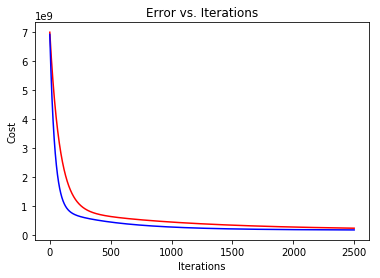

In [5]:
norm_x = x
norm_y = y

row = norm_x.shape[0]
col = norm_x.shape[1]

theta = np.ones((col,1))

x_t = np.transpose(norm_x)
mean_y = norm_y.mean()
   
def cost_function(norm_x, norm_y, theta):
    temp = np.power((np.dot(norm_x,theta) - norm_y),2)
    j = np.sum(temp)/(2*row)
    return j


#Linear regression Cost function
def gradient_descent_runner(norm_x, norm_y, theta, learning_rate, num_iterations):
    dim = (num_iterations, 1)
    cost = np.zeros(dim)
    for i in range(num_iterations):
        hyp = np.dot(norm_x,theta)
        err = hyp - norm_y 
        theta = theta - (learning_rate/row)*np.dot(x_t,err)
        cost[i] = cost_function(norm_x,norm_y,theta)
    return theta,cost


num_iterations = 2500
learning_rate1 = 0.005
learning_rate2 = 0.01

#for alpha1
theta_new,cost = gradient_descent_runner(norm_x, norm_y, theta, learning_rate1, num_iterations)
print(cost)
print(theta_new)

final_cost = cost_function(norm_x, norm_y, theta_new)
print(final_cost)

fig, ax = plt.subplots()  
ax.plot(np.arange(num_iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Iterations') 

#for alpha2 
theta_new,cost = gradient_descent_runner(norm_x, norm_y, theta, learning_rate2, num_iterations)
print(cost)
print(theta_new)

final_cost = cost_function(norm_x, norm_y, theta_new)
print(final_cost)

ax.plot(np.arange(num_iterations), cost, 'b')  

1042030169.5441236
1150360095.8096309


Text(0.5, 1.0, 'Error vs. Iterations')

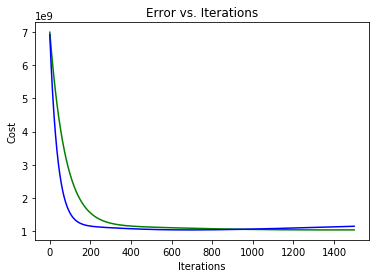

In [12]:
#Ridge Regression
lamda = 0.05
x = norm_x
y = norm_y

def cost_function_ridge(x, y, theta):
    hyp = np.power((np.dot(x,theta) - y),2)
    theta_T = np.transpose(theta)
    scalar = np.dot(theta_T,theta)
    j = np.sum(hyp)/(2*row) + (lamda*scalar)
    return j[0][0]

def gradient_descent_runner_ridge(x, y, theta, learning_rate, num_iterations):
    cost =[]
    for i in range(num_iterations):
        hyp = np.dot(x,theta)
        err = hyp - y 
        theta_T = np.transpose(theta)
        grad = (np.dot(x_t,err) + (lamda*theta))/row
        theta = theta - (learning_rate)*grad
        cost.append(cost_function_ridge(x,y,theta))
    return theta,cost

  
num_iterations = 1500
learning_rate1 = 0.005
learning_rate2 = 0.01

theta_new1, cost1 = gradient_descent_runner_ridge(x, y, theta, learning_rate1, num_iterations)
#print(cost1)
final_cost = cost_function_ridge(x, y, theta_new1)
print(final_cost)

theta_new2, cost2 = gradient_descent_runner_ridge(x, y, theta, learning_rate2, num_iterations)  
#print(cost2)
final_cost = cost_function_ridge(x, y, theta_new2)
print(final_cost)

fig, ax = plt.subplots()  
ax.plot(np.arange(num_iterations), cost1, 'g')
ax.plot(np.arange(num_iterations), cost2, 'b')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Iterations') 

336036164.5752006
207021757.86652282


Text(0.5, 1.0, 'Error vs. Iterations')

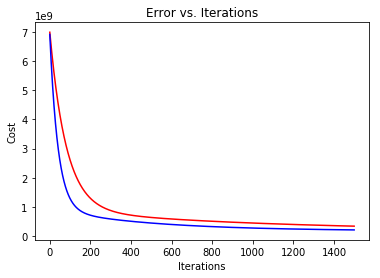

In [13]:
#Lasso 
lamda = 0.05
x = norm_x
y = norm_y

def cost_function_lasso(x, y, theta):
    hyp = np.power((np.dot(x,theta) - y),2)
    j = np.sum(hyp)/(2*row) + (lamda*np.absolute(theta).sum())
    return j


def gradient_descent_runner_lasso(x, y, theta, learning_rate, num_iterations):
    cost = []
    for i in range(num_iterations):
        err = np.dot(x,theta) - y
        grad = ((learning_rate)*np.dot(x_t,err) + lamda*np.sign(theta))/row
        theta = theta - grad
        cost.append(cost_function_lasso(x,y,theta))
    return theta,cost

  
num_iterations = 1500
learning_rate1 = 0.005
learning_rate2 = 0.01

theta_new1, cost1 = gradient_descent_runner_lasso(x, y, theta, learning_rate1, num_iterations)
#print(cost1)
final_cost = cost_function_lasso(x, y, theta_new1)
print(final_cost)

theta_new2, cost2 = gradient_descent_runner_lasso(x, y, theta, learning_rate2, num_iterations)  
#print(cost2)
final_cost = cost_function_lasso(x, y, theta_new2)
print(final_cost)

fig, ax = plt.subplots()  
ax.plot(np.arange(num_iterations), cost1, 'r')
ax.plot(np.arange(num_iterations), cost2, 'b')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Iterations') 

